## Введение в анализ данных, ИАД-4

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

In [ ]:
Задание выполнил(а): _Тамогашев Кирилл_

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 08.02.2020

__Дедлайн:__ 18.02.2020 23:59

### О задании

В этом домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача оценивается в 1 балл, за бонусную часть можно получить 1 балл.

Оценка за ДЗ вычисляется по следующей формуле:

$$
\left(\min(9, s_{\text{numpy}}) + \min(12, s_{\text{pandas}}) + \min(2, s_{\text{matplotlib}})\right) \times 10 / 23,
$$

где $s_{\text{numpy}}$ и $s_{\text{pandas}}$ — количество баллов, которое вы набрали за соответствующую часть. Задач больше, чем необходимо сделать для получения полного балла за ДЗ — вы можете сделать те, которые вам больше нравятся, или сделать все, чтобы дополнительно потренироваться. За каждую задачу сверх обязательных (9 в первой части, 12 во второй и 2 в третьей) дается 0.5 бонусных балла. Таким образом, за это домашнее задание можно получить 2 бонусных балла.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

## Часть 1. Numpy

In [ ]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [ ]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return int(weights @ marks + 0.5)# your code here

In [ ]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [ ]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [ ]:
def change_array(array: np.array, number: int) -> np.array:
    array[::3] = number
    return array # your code here

In [ ]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [ ]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [ ]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.where(precision >= abs(array1 - array2))[0]# your code here

In [ ]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [ ]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [ ]:
def block_matrix(block: np.array) -> np.array:
    return np.vstack((np.hstack((block, block)), np.hstack((block, block))))# your code here

In [ ]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [ ]:
def diag_prod(matrix: np.array) -> int:
    return matrix.diagonal()[matrix.diagonal() != 0].prod()# your code here

In [ ]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [ ]:
def normalize(matrix: np.array) -> np.array:
    return (matrix - matrix.mean(axis=0)) / np.std(matrix, axis=0)# your code here

In [ ]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [ ]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [ ]:
def antiderivative(coefs: np.array) -> np.array:
    antidic_coefs = np.arange(coefs.shape[0], 0, -1)
    return np.append(coefs / antidic_coefs, 0)# your code here

In [ ]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [ ]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [ ]:
def make_symmetric(matrix: np.array) -> np.array:
    return matrix + matrix.T - np.diag(matrix.diagonal())# your code here

In [ ]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [ ]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [ ]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    return np.array([range(a, b + 1)] * m)# your code here

In [ ]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [ ]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [ ]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    return sum(vec1 * vec2) / (np.linalg.norm(vec2) * np.linalg.norm(vec1))# your code here

In [ ]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [ ]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [4]:
pass_data = pd.read_csv('train.csv')# your code here

### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

(PassengerId    891 non-null int64 целое число 
Survived       891 non-null int64 целое число
Pclass         891 non-null int64 целое число
Name           891 non-null object категор
Sex            891 non-null object  категор
Age            714 non-null float64 веществ
SibSp          891 non-null int64 целое число
Parch          891 non-null int64 целое число
Ticket         891 non-null object категор
Fare           891 non-null float64 веществ
Cabin          204 non-null object категор
Embarked       889 non-null object)категор

1) регрессия: зависимость дороговизны каюты от возраста
2) классификация: классифицировать пассажиров по уровню достатка 
3) кластеризация: сгруппировать на кластеры по возрастам (0 -  20, 20 - 40, - 60, 60   - 80). Рассчитать все возможные параметры 

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [ ]:
alive = pass_data[(pass_data.Survived == 1)].shape[0] / pass_data.shape[0] # 0.38
women_alive = pass_data[(pass_data.Survived == 1) & 
                       (pass_data.Sex == 'female')].shape[0] / pass_data[(pass_data.Survived == 1)].shape[0] # 0.68
men_alive = pass_data[(pass_data.Survived == 1) & 
                       (pass_data.Sex == 'male')].shape[0] / pass_data[(pass_data.Survived == 1)].shape[0] # 0.32

### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [ ]:
pClass_1 = pass_data[(pass_data.Pclass == 1)].shape[0] # 216
pClass_2 = pass_data[(pass_data.Pclass == 2)].shape[0] # 184
pClass_3 = pass_data[(pass_data.Pclass == 3)].shape[0] # 491

men_3 = pass_data[(pass_data.Pclass == 3) & (pass_data.Sex == 'male')].shape[0] # 347
women_3 = pass_data[(pass_data.Pclass == 3) & (pass_data.Sex == 'female')].shape[0] # 144
# мужчин больше

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

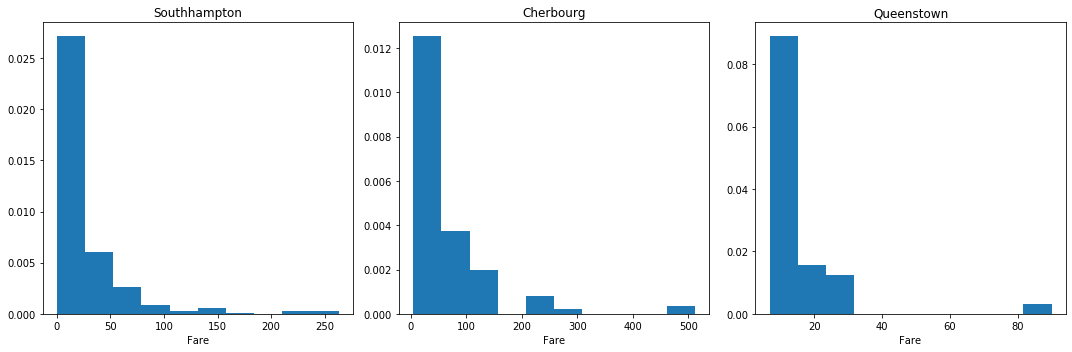

In [19]:
pass_data['Fare'].describe().loc[['min','max','mean']]
# min       0.000000
# max     512.329200
# mean     32.204208
pass_data[(pass_data.Embarked == 'S')]['Fare'].describe().loc[['min','max','mean']]
# min       0.000000
# max     263.000000
# mean     27.079812

(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,5))
ax1.hist(pass_data[(pass_data.Embarked =='S')]['Fare'], normed=True)
ax1.set_title('Southhampton')
ax1.set_xlabel('Fare')
ax2.hist(pass_data[(pass_data.Embarked =='C')]['Fare'], normed=True)
ax2.set_title('Cherbourg')
ax2.set_xlabel('Fare')
ax3.hist(pass_data[(pass_data.Embarked =='Q')]['Fare'], normed=True)
ax3.set_title('Queenstown')
ax3.set_xlabel('Fare')
plt.tight_layout()

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [40]:
pass_data.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)# отсутствуют релевантные статистические данные для анализа

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [ ]:
pass_data.isnull().sum() # your code here

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [30]:
emb = pass_data.Embarked.dropna().mode()[0]  
pass_data['Embarked'] = pass_data['Embarked'].fillna(emb)

pass_data["Age"] = pass_data['Age'].fillna(pass_data.Age.mode()[0])

pass_data["Cabin"] = pass_data['Cabin'].fillna('maybe lives with relatives')

pass_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Relatives      0
dtype: int64

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [31]:
print(pass_data["Age"].corr(pass_data['Fare']))

0.10755403574893892


### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [32]:
pass_data[['Fare', 'Survived']].groupby(['Survived']).mean()

,Fare
Survived,
0,22.117887
1,48.395408


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [50]:
Relatives = 1 + pass_data['Parch'] + pass_data['SibSp']
pass_data['Relatives'] = Relatives
pass_data.head()
#how many people were retired ones (people were considered retired in 1910s if thay were  over 70 y.o.)
is_old = (pass_data.Age > 70).astype(int)
pass_data['is_old'] = is_old
pass_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,is_old
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,live with relatives,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,live with relatives,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,live with relatives,S,1,0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

In [ ]:
какая часть  детей (<18) не спаслась

In [37]:
child_Died = pass_data[(pass_data['Age'] < 18) & (pass_data.Survived==0)].shape[0] 
child = pass_data[(pass_data['Age'] < 18)].shape[0]
print(child_Died / child)

0.46017699115044247


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,live with relatives,S,5
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,live with relatives,S,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,live with relatives,Q,6
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,live with relatives,S,5
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,live with relatives,S,6
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,live with relatives,S,8
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,live with relatives,S,6
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,live with relatives,S,8
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,live with relatives,S,5
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,live with relatives,C,2


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [ ]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15,6))
ax1.hist(pass_data.Age, normed=True)
ax2.hist(pass_data.Fare, normed=True)
ax1.set_title('Age distributed')
ax2.set_title('Fare distributed')
plt.show()
# отсутствие нормировки - нет возможности сопоставлять различные данные

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [12]:
p_d = pass_data.copy()
p_d.Embarked = p_d.Embarked.map({'S': 1, 'C': 2, 'Q': 3}).astype(int)
p_d.Sex = p_d.Sex.map({'male': 0, 'female': 1}).astype(int)
p_d.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,live with relatives,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,live with relatives,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,live with relatives,1


# Часть 3. Matplotlib

### 25

In [ ]:
(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(13,6), sharey=True)
ax1.hist(pass_data[(pass_data.Pclass == 1)]['Age'], edgecolor='black', bins=20, normed=True)
ax1.set_title('Class 1')
ax1.set_ylabel('Scaled number of passangers')
ax1.set_xlabel('Age')
ax2.hist(pass_data[(pass_data.Pclass == 2)]['Age'], edgecolor='black',  bins=20, normed=True)
ax2.set_title('Class 2')
ax2.set_xlabel('Age')
ax3.hist(pass_data[(pass_data.Pclass == 3)]['Age'], edgecolor='black',  bins=20, normed=True)
ax3.set_title('Class 3')
ax3.set_xlabel('Age')


plt.tight_layout()

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

In [ ]:
# В итоге ваш график должен получиться примерно таким:

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

In [ ]:
x = np.linspace(-1, 5, 100)
plt.figure(figsize=(10,8))
plt.plot(x, np.sin(x), label='sin(x)', linestyle='dashed')
plt.plot(x, np.cos(x), label='cos(x)')

plt.legend();
plt.show()# В итоге ваш график должен получиться примерно таким:

### 27

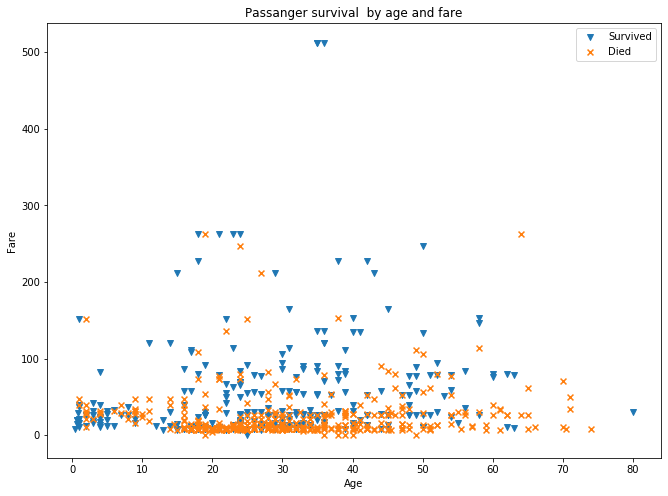

In [3]:
plt.figure(figsize=(11,8))
plt.scatter(x=pass_data[(pass_data.Survived==1)]['Age'], y=pass_data[(pass_data.Survived==1)]['Fare'], marker='v', label='Survived', s=35)
plt.scatter(x=pass_data[(pass_data.Survived==0)]['Age'], y=pass_data[(pass_data.Survived==0)]['Fare'], marker='x', label='Died', s=35)
plt.title('Passanger survival  by age and fare')
plt.ylabel('Fare')
plt.xlabel('Age')
plt.legend();

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

In [ ]:
# В итоге ваш график должен получиться примерно таким: